In [10]:
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
from shapely.geometry import Point
import matplotlib.pyplot as plt
import requests
import numpy as np

In [2]:
# Step 1: Retrieve Data from SEDS API
seds_url =  "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&t_cap=gt.0&select=case_id,xlong,ylat,p_year"
response = requests.get(seds_url)
data = response.json()
data

[{'case_id': 3123985, 'xlong': -99.78703, 'ylat': 36.50172, 'p_year': 2022},
 {'case_id': 3123544, 'xlong': -99.72562, 'ylat': 36.43713, 'p_year': 2022},
 {'case_id': 3123887, 'xlong': -99.76972, 'ylat': 36.44493, 'p_year': 2022},
 {'case_id': 3123765, 'xlong': -99.80706, 'ylat': 36.51394, 'p_year': 2022},
 {'case_id': 3123814, 'xlong': -99.75848, 'ylat': 36.44498, 'p_year': 2022},
 {'case_id': 3124001, 'xlong': -99.77213, 'ylat': 36.43193, 'p_year': 2022},
 {'case_id': 3123319, 'xlong': -99.74037, 'ylat': 36.48984, 'p_year': 2022},
 {'case_id': 3123541, 'xlong': -99.81001, 'ylat': 36.47658, 'p_year': 2022},
 {'case_id': 3123321, 'xlong': -99.76249, 'ylat': 36.4549, 'p_year': 2022},
 {'case_id': 3123797, 'xlong': -99.76167, 'ylat': 36.50279, 'p_year': 2022},
 {'case_id': 3124003, 'xlong': -99.77658, 'ylat': 36.48539, 'p_year': 2022},
 {'case_id': 3123519, 'xlong': -99.72443, 'ylat': 36.49138, 'p_year': 2022},
 {'case_id': 3124041, 'xlong': -99.71498, 'ylat': 36.49021, 'p_year': 2022},


In [3]:
# Step 2: Convert to DataFrame
# Adjust the following line according to the actual structure of the SEDS API response
#df = pd.DataFrame(data)
df=pd.json_normalize(data)
df

case_id      xlong      ylat  p_year
0      3123985  -99.78703  36.50172  2022.0
1      3123544  -99.72562  36.43713  2022.0
2      3123887  -99.76972  36.44493  2022.0
3      3123765  -99.80706  36.51394  2022.0
4      3123814  -99.75848  36.44498  2022.0
...        ...        ...       ...     ...
69812  3003325 -162.55733  66.83433  2003.0
69813  3109704 -116.55776  33.89111  2020.0
69814  3110036 -116.55260  33.89020  2020.0
69815  3110328 -116.55264  33.89168  2020.0
69816  3124485  -83.13453  41.44075     NaN

[69817 rows x 4 columns]

In [4]:
# Step 3: Explore, Clean, and Analyze the Data
# Explore the data
print(df.head())


   case_id     xlong      ylat  p_year
0  3123985 -99.78703  36.50172  2022.0
1  3123544 -99.72562  36.43713  2022.0
2  3123887 -99.76972  36.44493  2022.0
3  3123765 -99.80706  36.51394  2022.0
4  3123814 -99.75848  36.44498  2022.0


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69817 entries, 0 to 69816
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case_id  69817 non-null  int64  
 1   xlong    69817 non-null  float64
 2   ylat     69817 non-null  float64
 3   p_year   69810 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.1 MB
None


In [6]:
print(df.describe())

            case_id         xlong          ylat        p_year
count  6.981700e+04  69817.000000  69817.000000  69810.000000
mean   3.065007e+06    -99.436027     38.481179   2013.072726
std    3.436237e+04     10.725880      5.450534      6.545578
min    3.000020e+06   -171.713070     13.389380   1982.000000
25%    3.036077e+06   -102.337990     34.300930   2009.000000
50%    3.055175e+06    -98.991780     39.118550   2014.000000
75%    3.096398e+06    -94.978020     42.841690   2018.000000
max    3.131492e+06    144.722660     66.839910   2023.000000


In [7]:
# Clean the data
# Example: Remove rows with missing values
df_cleaned = df.dropna()
df_cleaned

case_id      xlong      ylat  p_year
0      3123985  -99.78703  36.50172  2022.0
1      3123544  -99.72562  36.43713  2022.0
2      3123887  -99.76972  36.44493  2022.0
3      3123765  -99.80706  36.51394  2022.0
4      3123814  -99.75848  36.44498  2022.0
...        ...        ...       ...     ...
69811  3001855 -162.55158  66.83790  2003.0
69812  3003325 -162.55733  66.83433  2003.0
69813  3109704 -116.55776  33.89111  2020.0
69814  3110036 -116.55260  33.89020  2020.0
69815  3110328 -116.55264  33.89168  2020.0

[69810 rows x 4 columns]

In [ ]:
#Save Your DataFrame to a CSV File
df=df.to_csv('wind_turbines.csv', index=False)
df=pd.read_csv('wind_turbines.csv')
df.head(5)

In [ ]:
#  Distribution of wind turbines by year
installation_trend=df_cleaned['p_year'].value_counts().sort_index()
installation_trend

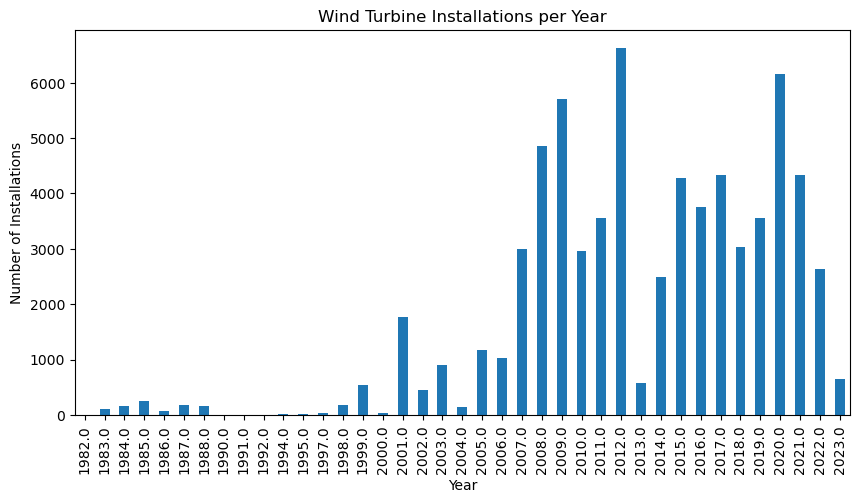

In [11]:
# Box plot distribution by year 
plt.figure(figsize=(10, 5))
installation_trend.plot(kind='bar')
plt.title('Wind Turbine Installations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Installations')
plt.show()

In [ ]:
def get_state(lat, lon, attempt=1, max_attempts=5):
    try:
        geolocator = Nominatim(user_agent="geoapiExercises")
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address = location.raw['address']
        return address.get('state', None)
    except (GeocoderTimedOut, requests.exceptions.ConnectTimeout):
        if attempt <= max_attempts:
            time.sleep(5)  # Wait for 5 seconds before retrying
            return get_state(lat, lon, attempt + 1)
        return None
    except Exception as e:
        print(f"Error occurred: {e}")
        return None



In [ ]:
# Assuming 'dfClusterMap' is your DataFrame with latitude and longitude columns
# Create a GeoDataFrame with point geometries
geometry = [Point(xy) for xy in zip(df['xlong'], df['ylat'])]
gdfClusterMap = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS to EPSG:4326
gdfClusterMap.crs = 'EPSG:4326'

# Now you can perform a spatial join using gdfClusterMap as the GeoDataFrame
df = gpd.sjoin(gdfClusterMap,gdfClusterMap, how="left", predicate="within")
df.head(5)

In [ ]:
for index, row in df.iterrows():
    df.at[index, 'state'] = get_state(row['ylat'], row['xlong'])
    time.sleep(1)  # Sleep for 1 second between requests

In [ ]:
# Now df has an additional 'state' column
print(df)

In [ ]:
# 1. Distribution by State
state_counts = df_uswtdb['state'].value_counts()
top_ten_states = state_counts.head(10)
print("Top Ten States by Wind Turbine Installations:")
print(top_ten_states)



In [ ]:
# 2. Trend of Installation for Top 10 States
top_states_trend = df_uswtdb[df_uswtdb['state'].isin(top_ten_states.index)].groupby(['state', 'p_year']).size().unstack(fill_value=0)
top_states_trend.plot(kind='line', figsize=(12, 6))
plt.title('Yearly Wind Turbine Installations in Top 10 States')
plt.xlabel('Year')
plt.ylabel('Number of Installations')
plt.legend(title='State')
plt.show()



In [ ]:
# 3. Heatmap
# Create a basic heatmap using latitude and longitude
plt.figure(figsize=(10, 6))
sns.heatmap(df_uswtdb.pivot_table(index='ylat', columns='xlong', aggfunc='size', fill_value=0), cmap='viridis')
plt.title('Heatmap of Wind Turbine Installations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()